# Importing Libraries and Modules

In [103]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing,Standardizing
from sklearn.preprocessing import StandardScaler

#For Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Models
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

#Metrics
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,roc_curve,roc_auc_score,precision_score,classification_report,plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [104]:
df=pd.read_csv(r'C:\Users\delkl\Desktop\DataTrained Data Science Projects\Projects\powerplant.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [105]:
df.shape

(908, 25)

There are 908 rows and 25 columns in the dataset

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

We can see there are missing values and we have object types and float data types in our variables. capaciy_mw is our target variable

In [107]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

There are missing values in latitude, longitude, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_data_source and estimated_generation_gwh

In [110]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [111]:
#Observation:

#1. Null values in number of columns
#2. Outliers in longitude , generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, and generation_gwh_2013

# Univariate Analysis

In [113]:
df_numerical=df[['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

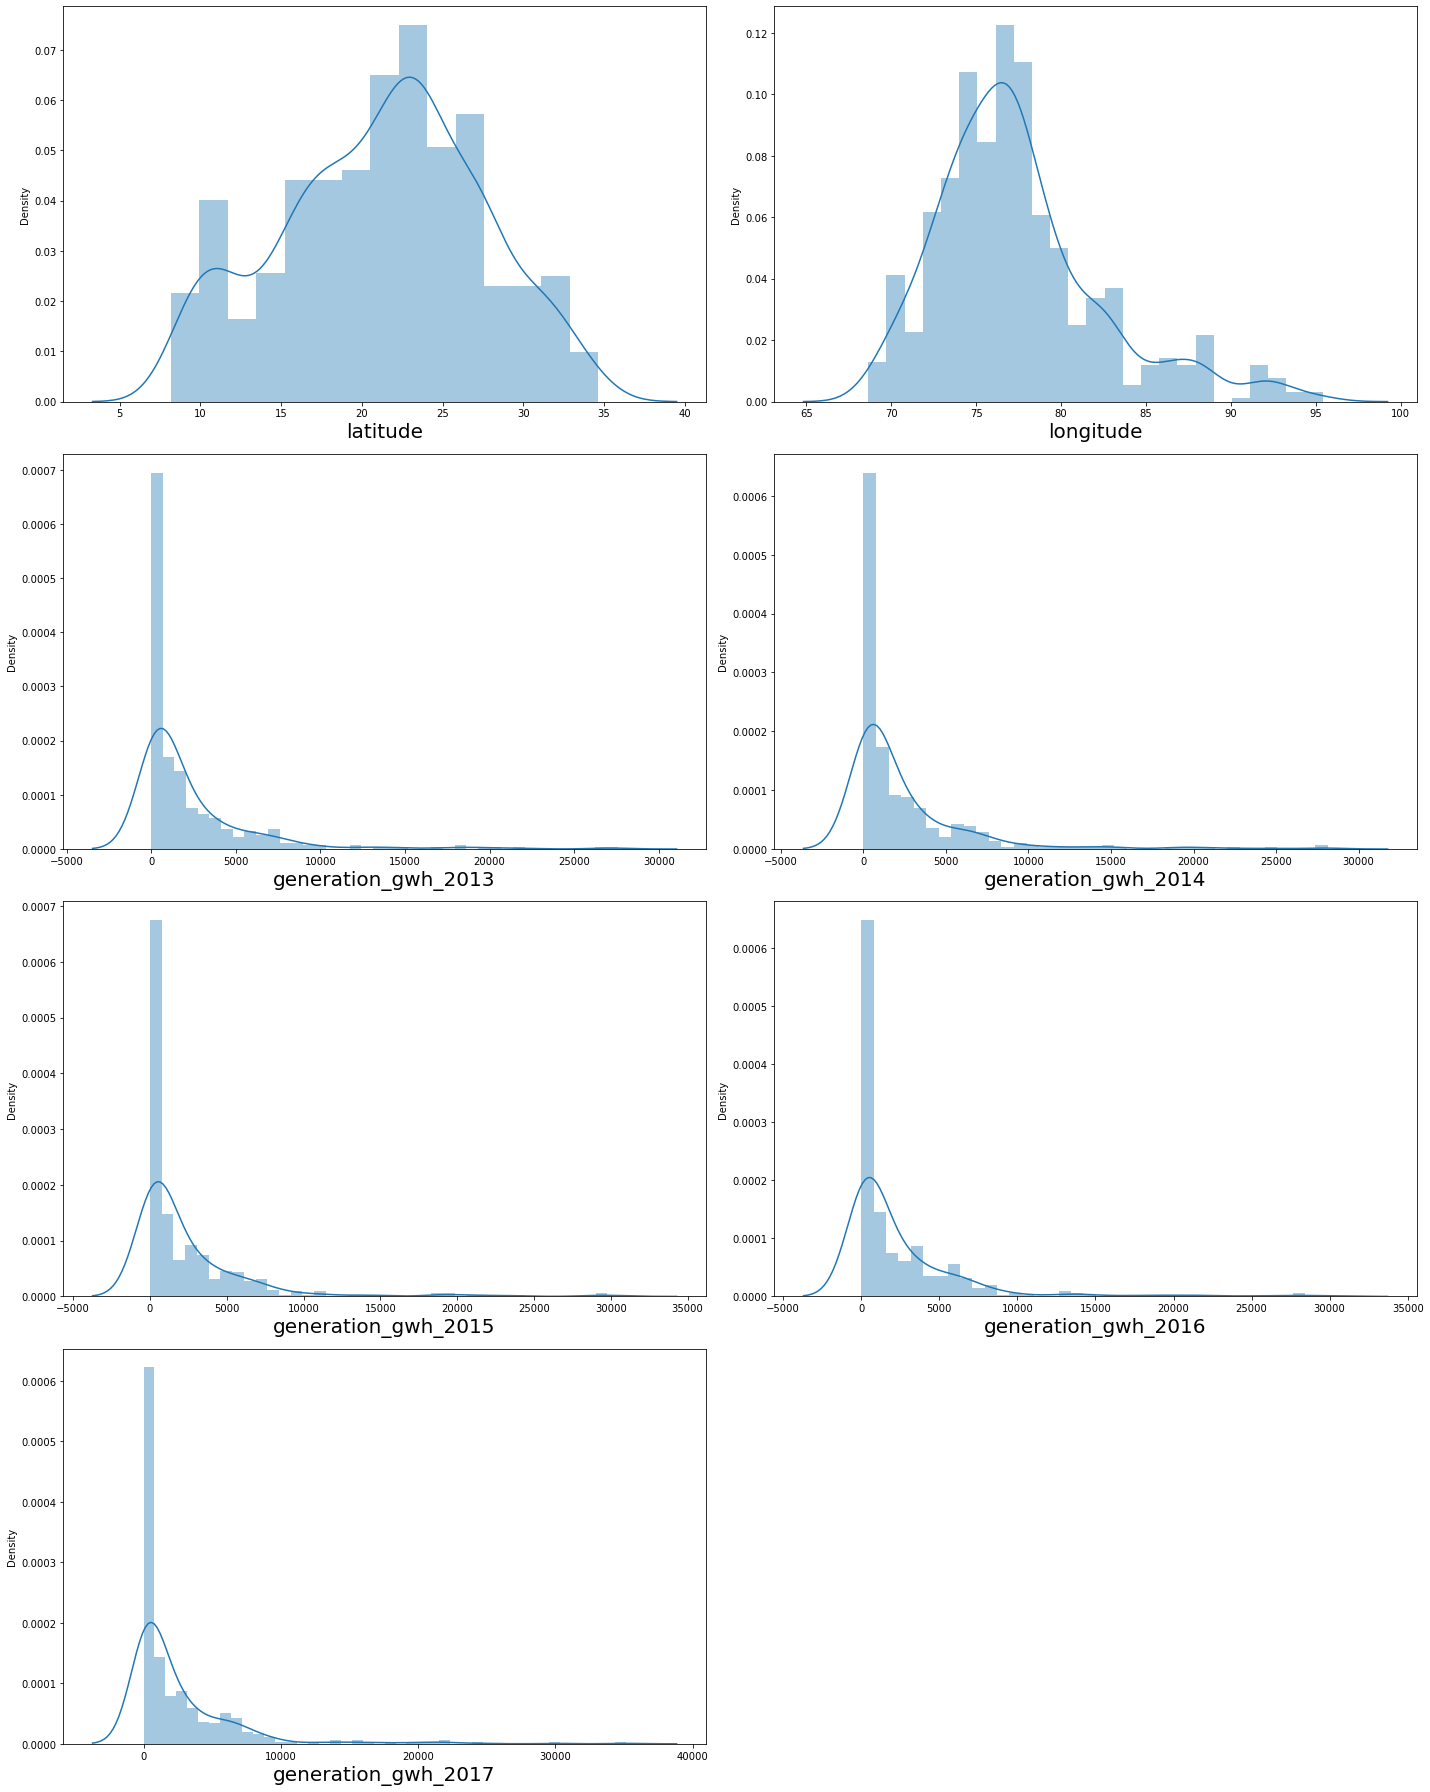

In [114]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df_numerical:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(df_numerical[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

longitude, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 are right skewed while latitude is normally distributed

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

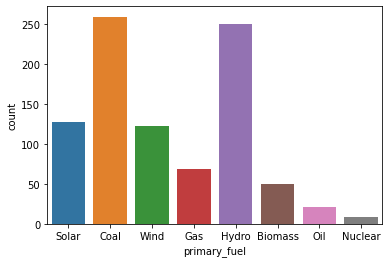

In [115]:
sns.countplot(df['primary_fuel'])

Coal and Hydro are the most used primary fuel while Nuclear is the least used

In [119]:
df.other_fuel1.value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

The maximum count is for Oil category

In [120]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [121]:
df.commissioning_year.value_counts()

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1939.0     1
1927.0     1
1949.0     1
1956.0     1
1969.0     1
Name: commissioning_year, Length: 73, dtype: int64

The maximum count for commissioning year is 2013

In [122]:
df.owner.value_counts()

Acc Acc ltd                             4
Jk Cement ltd                           4
Sterling Agro Industries ltd.           4
Hindustan Zinc ltd                      3
Enercon India Ltd.                      3
                                       ..
Essel Clean Energy Limited              1
Lokmangal Lokmangal group               1
Ym Ssk ltd                              1
Abellon CleanEnergy Limited             1
Omega Solar Projects Private Limited    1
Name: owner, Length: 280, dtype: int64

Acc Acc ltd owns the maximum number of powerplants

# Preprocessing

In [126]:
df.drop(columns=['country','country_long','name','gppd_idnr','other_fuel2','other_fuel3','url','wepp_id','year_of_capacity_data','generation_data_source','estimated_generation_gwh'],axis=1,inplace=True)

Dropping all these features because it gives no meaning to the dataset

## Replacing Null Values

In [124]:
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['owner']=df['owner'].fillna(df['owner'].mode()[0])
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   other_fuel1          908 non-null    object 
 5   commissioning_year   908 non-null    float64
 6   owner                908 non-null    object 
 7   source               908 non-null    object 
 8   geolocation_source   908 non-null    object 
 9   generation_gwh_2013  908 non-null    float64
 10  generation_gwh_2014  908 non-null    float64
 11  generation_gwh_2015  908 non-null    float64
 12  generation_gwh_2016  908 non-null    float64
 13  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), object(5)
memory usage: 99.4+ KB


We have successfully replaced all the null values

## Encoding

In [128]:
#Converting strings into numberical format

from sklearn.preprocessing import LabelEncoder

lab_enc=LabelEncoder()

df1=lab_enc.fit_transform(df['owner'])
df2=lab_enc.fit_transform(df['other_fuel1'])
df3=lab_enc.fit_transform(df['geolocation_source'])
df4=lab_enc.fit_transform(df['primary_fuel'])
df5=lab_enc.fit_transform(df['source'])


df['owner']=df1
df['other_fuel1']=df2
df['geolocation_source']=df3
df['primary_fuel']=df4
df['source']=df5

In [129]:
df.head(10)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2,2011.0,229,109,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1,2,2013.0,258,174,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,7,2,2013.0,2,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2,2,2004.0,5,22,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2,2015.0,5,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
5,250.0,23.7689,68.6447,1,2,2005.0,5,22,2,821.798000,1153.421000,1208.852000,1175.765000,1147.913000
6,60.0,10.4547,77.0078,3,2,1970.0,5,22,2,147.568450,157.558250,152.195200,61.421350,89.629600
7,192.0,32.2258,77.2070,3,2,2010.0,5,22,2,696.738800,674.391100,721.335200,675.724400,679.594950
8,290.0,16.3300,75.8863,3,2,2004.0,5,22,2,504.813250,480.594950,144.434200,402.029750,439.372100
9,210.0,23.1642,81.6373,1,2,2008.0,5,22,2,2642.322000,1887.904000,1643.046000,1338.093000,1563.457000


We have successfully converted all the string values to numerical values

# Multivariate Analysis

In [131]:
#finding out correlation between the features

corr_df=df.corr()
corr_df.shape

(14, 14)

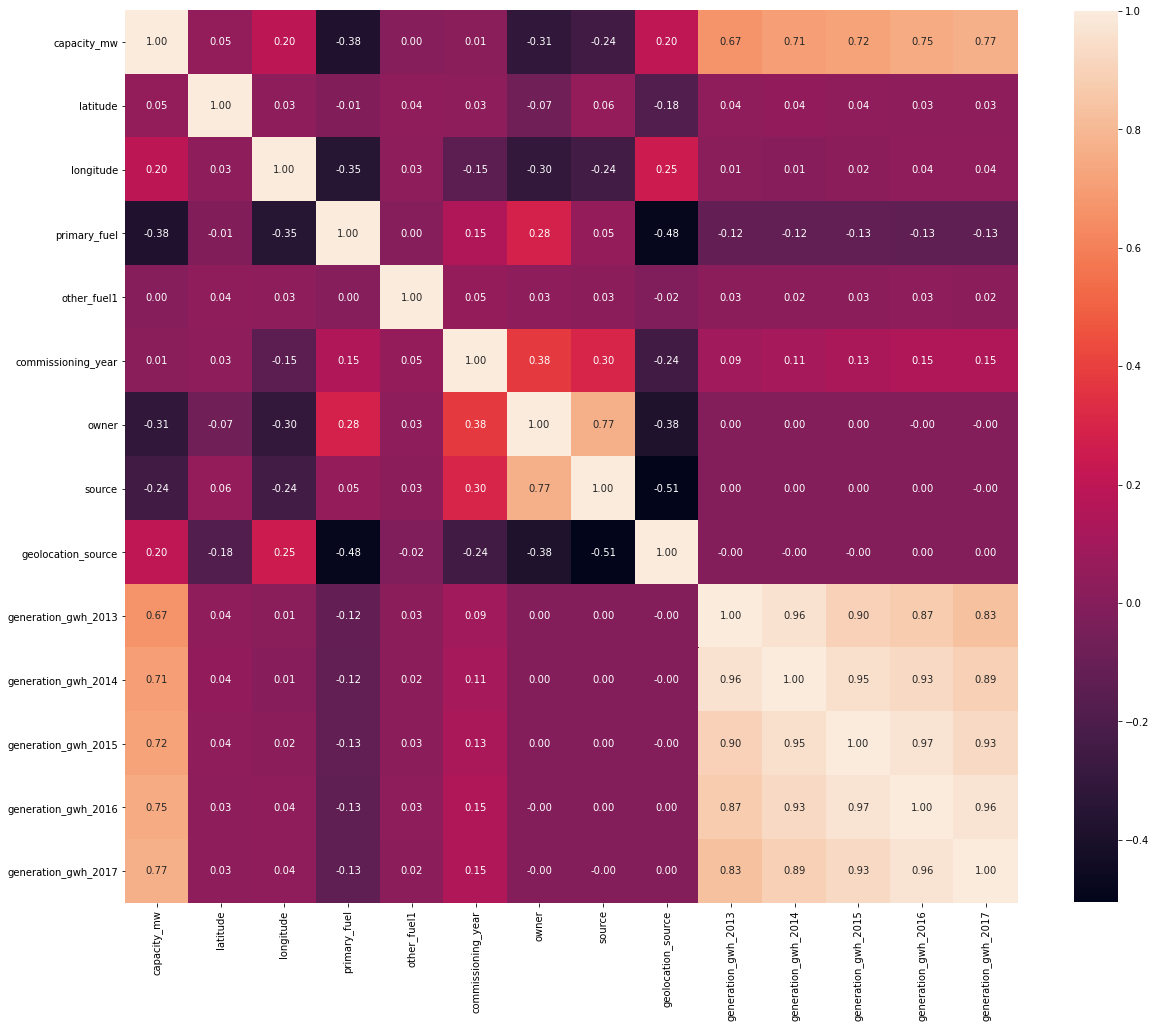

In [132]:
#plotting the heatmap of correlation between features

plt.figure(figsize=(20,20))

sns.heatmap(corr_df,cbar=True,square=True,cbar_kws={'shrink':0.82},fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

We see very strong correlation between features generation_gwh_2013 with generation_gwh_2014, generation_gwh_2015, generation_gwh_2016 and generation_gwh_2017. 

## Finding Outliers

In [133]:
df_features=df[['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

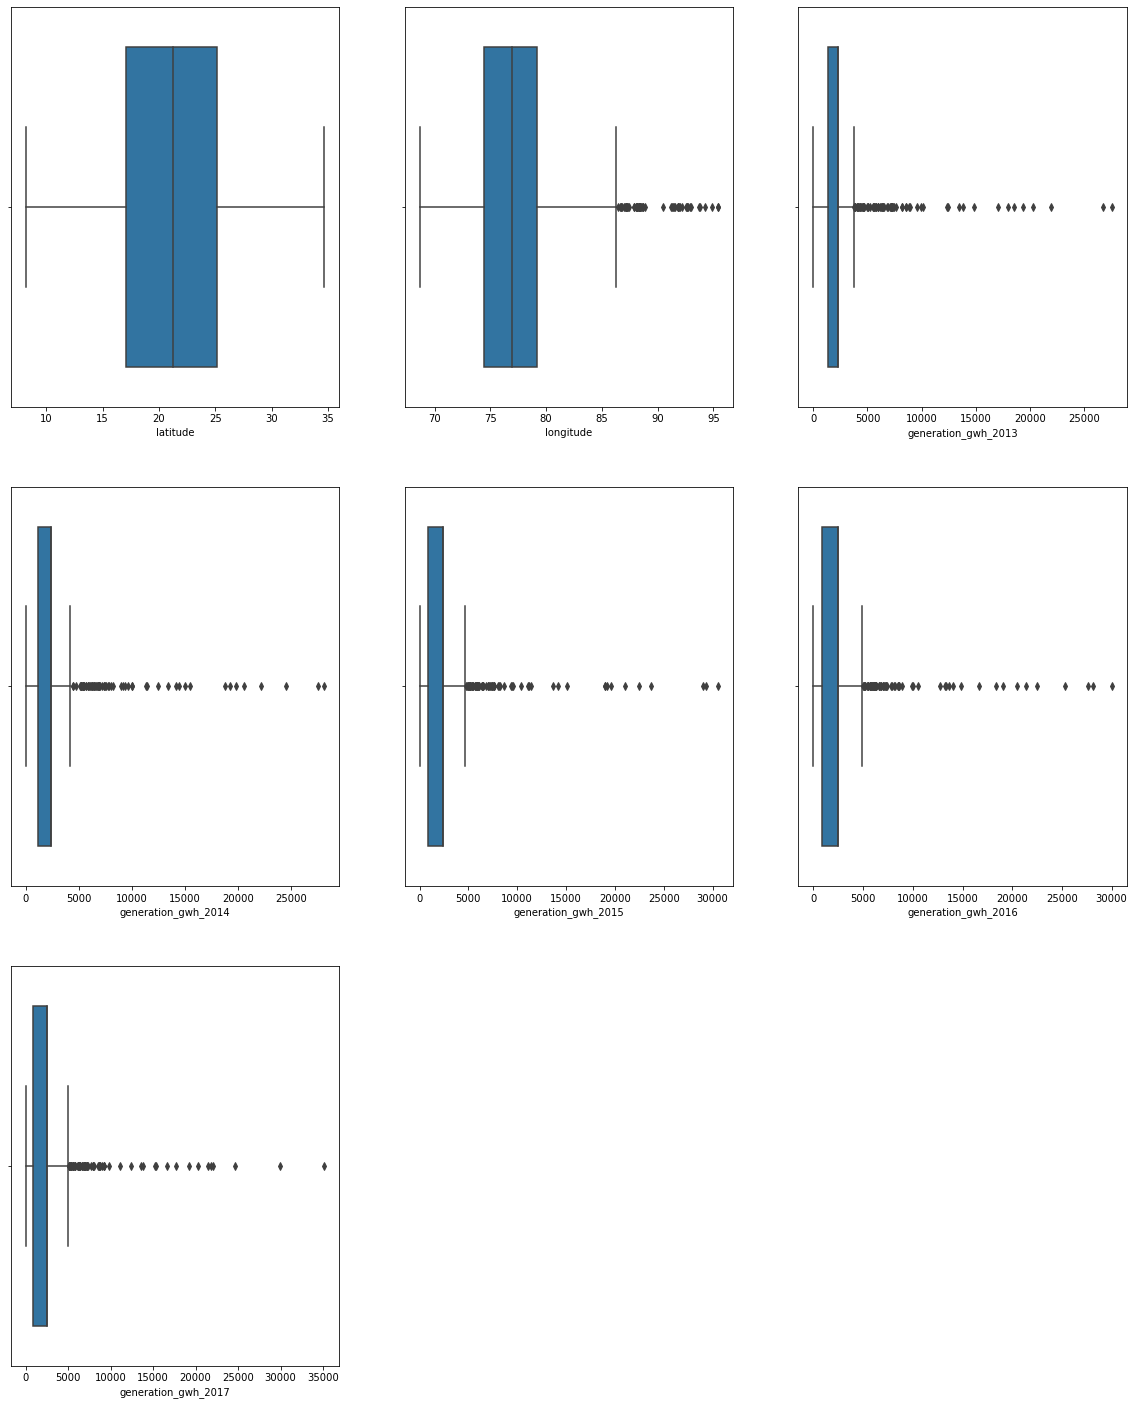

In [87]:
plt.figure(figsize=(20,25))
graph=1

for column in df_features:
    if(graph<=9):
        ax=plt.subplot(3,3,graph)
        sns.boxplot(df_features[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

We see outliers in longitude, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016 and generation_gwh_2017

## Removing Outliers

In [134]:
from scipy.stats import zscore

z_score=zscore(df[['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,272.583767,21.089931,77.036419,3.257176,1.995408,2003.871412,58.109070,44.649828,1.724455,2058.367224,2141.852179,2111.789252,2151.659399,2238.160193
std,439.479660,6.145269,4.197722,2.303519,0.082918,15.287573,83.497736,45.283249,0.686377,1373.993102,1463.897894,1510.789501,1575.298639,1644.907916
min,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.500000,16.899050,74.329400,1.000000,2.000000,1998.000000,5.000000,22.000000,2.000000,1369.559750,1211.362750,886.201575,819.636225,871.375600
50%,50.700000,21.196189,76.760600,3.000000,2.000000,2013.000000,5.000000,22.000000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,330.000000,25.114850,78.922500,6.000000,2.000000,2013.000000,103.500000,37.500000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,2400.000000,34.649000,91.565000,7.000000,2.000000,2018.000000,279.000000,190.000000,2.000000,8965.595000,9983.018000,10422.690000,10503.882000,9833.690000


In [135]:
df.shape

(871, 14)

In [136]:
(908-871)/908*100

4.074889867841409

We have lost around 4% of data which is acceptable

## Checking Skewness

In [137]:
df.skew()

capacity_mw             2.157963
latitude               -0.102142
longitude               0.858318
primary_fuel            0.427117
other_fuel1           -20.041540
commissioning_year     -1.829596
owner                   1.309453
source                  1.771230
geolocation_source     -2.105485
generation_gwh_2013     1.528166
generation_gwh_2014     1.444235
generation_gwh_2015     1.323894
generation_gwh_2016     1.336249
generation_gwh_2017     1.272489
dtype: float64

There is skewness in longitude, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016 and generation_gwh_2017

## Removing Skewness

In [138]:
df['longitude']=np.sqrt(df['longitude'])
df['generation_gwh_2013']=np.sqrt(df['generation_gwh_2013'])
df['generation_gwh_2014']=np.sqrt(df['generation_gwh_2014'])
df['generation_gwh_2015']=np.sqrt(df['generation_gwh_2015'])
df['generation_gwh_2016']=np.sqrt(df['generation_gwh_2016'])
df['generation_gwh_2017']=np.sqrt(df['generation_gwh_2017'])

In [139]:
df.skew()

capacity_mw             2.157963
latitude               -0.102142
longitude               0.768800
primary_fuel            0.427117
other_fuel1           -20.041540
commissioning_year     -1.829596
owner                   1.309453
source                  1.771230
geolocation_source     -2.105485
generation_gwh_2013    -0.484022
generation_gwh_2014    -0.497446
generation_gwh_2015    -0.457438
generation_gwh_2016    -0.410046
generation_gwh_2017    -0.408799
dtype: float64

In [238]:
X=df.drop(columns=['capacity_mw'],axis=1)
y=df['capacity_mw']

Splitting the data into features and labels

In [254]:
#Checking multicollinearity by vif

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.071327,latitude
1,1.280725,longitude
2,1.839989,primary_fuel
3,1.010479,other_fuel1
4,1.298394,commissioning_year
5,1.959534,owner
6,2.985194,source
7,2.313840,geolocation_source
8,4.810607,generation_gwh_2013
9,6.322121,generation_gwh_2014


The collinearity is confirmed so we will delete one of the feature that has high collinearity

In [255]:
X.drop(columns=['generation_gwh_2016'],axis=1,inplace=True)

In [256]:
#Checking multicollinearity by vif

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.068964,latitude
1,1.274738,longitude
2,1.838047,primary_fuel
3,1.008495,other_fuel1
4,1.293645,commissioning_year
5,1.959484,owner
6,2.984513,source
7,2.313196,geolocation_source
8,4.740203,generation_gwh_2013
9,6.248281,generation_gwh_2014


In [257]:
X.drop(columns=['generation_gwh_2014'],axis=1,inplace=True)

In [258]:
#Checking multicollinearity by vif

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.067545,latitude
1,1.274728,longitude
2,1.837084,primary_fuel
3,1.008132,other_fuel1
4,1.283809,commissioning_year
5,1.959172,owner
6,2.982911,source
7,2.313176,geolocation_source
8,2.631400,generation_gwh_2013
9,3.301019,generation_gwh_2015


No collinearity issue

# Model Training

## Finding the best random state

In [259]:
maxAccu=0
maxRs=0
for i in range(1,200):
    X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(X_train,Y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best accuracy is:",maxAccu,"on Random State",maxRs)

Best accuracy is: 0.8100010124125828 on Random State 138


In [260]:
X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=138)

Splitting the data into train and test set

### Checking accuracy by testing different models

In [261]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,Y_train)
pred=DTR.predict(x_test)
print(r2_score(y_test,pred))

0.7573654370156107


The accuracy for Decision Tree Regressor is 76%

In [262]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(x_test)
print(r2_score(y_test,pred))

0.5472926688373136


The accuracy for Linear Regression is 55%

In [263]:
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)
pred=RFR.predict(x_test)
print(r2_score(y_test,pred))

0.8531177851821552


The accuracy for Random Forest Regressor is 85%

In [265]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,Y_train)
pred=ada.predict(x_test)
print(r2_score(y_test,pred))

0.6388853540235921


The accuracy for AdaBoost Regressor is 64%

## Regularization

In [214]:
from sklearn.linear_model import Lasso

In [266]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [267]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.5462698081568341

## Cross validation

In [217]:
from sklearn.model_selection import cross_val_score

In [268]:
print(cross_val_score(lr,X_scaler,y,cv=5).mean())

0.4339471936968159


In [269]:
print(cross_val_score(DTR,X_scaler,y,cv=5).mean())

0.5567378109367748


In [270]:
print(cross_val_score(RFR,X_scaler,y,cv=5).mean())

0.7418613849933421


In [272]:
print(cross_val_score(ada,X_scaler,y,cv=5).mean())

0.4471611812821289


The difference between Accuracy and Cross validation is the least in RFR, so RFR is our best model

## Hyperparameter Tuning

In [273]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [275]:
Final_model=RandomForestRegressor(max_features='log2',criterion='mse')
Final_model.fit(X_train,Y_train)
pred=Final_model.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy:',acc*100)

Accuracy: 87.0330958504932


We have increase our accuracy to 87%

# Predicting Fuel Type

## Loading the dataset

In [142]:
powerplant=pd.read_csv(r'C:\Users\delkl\Desktop\DataTrained Data Science Projects\Projects\powerplant.csv')
powerplant

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA is same as done for df

## Univariate Analysis

In [143]:
powerplant_numerical=powerplant[['capacity_mw','latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

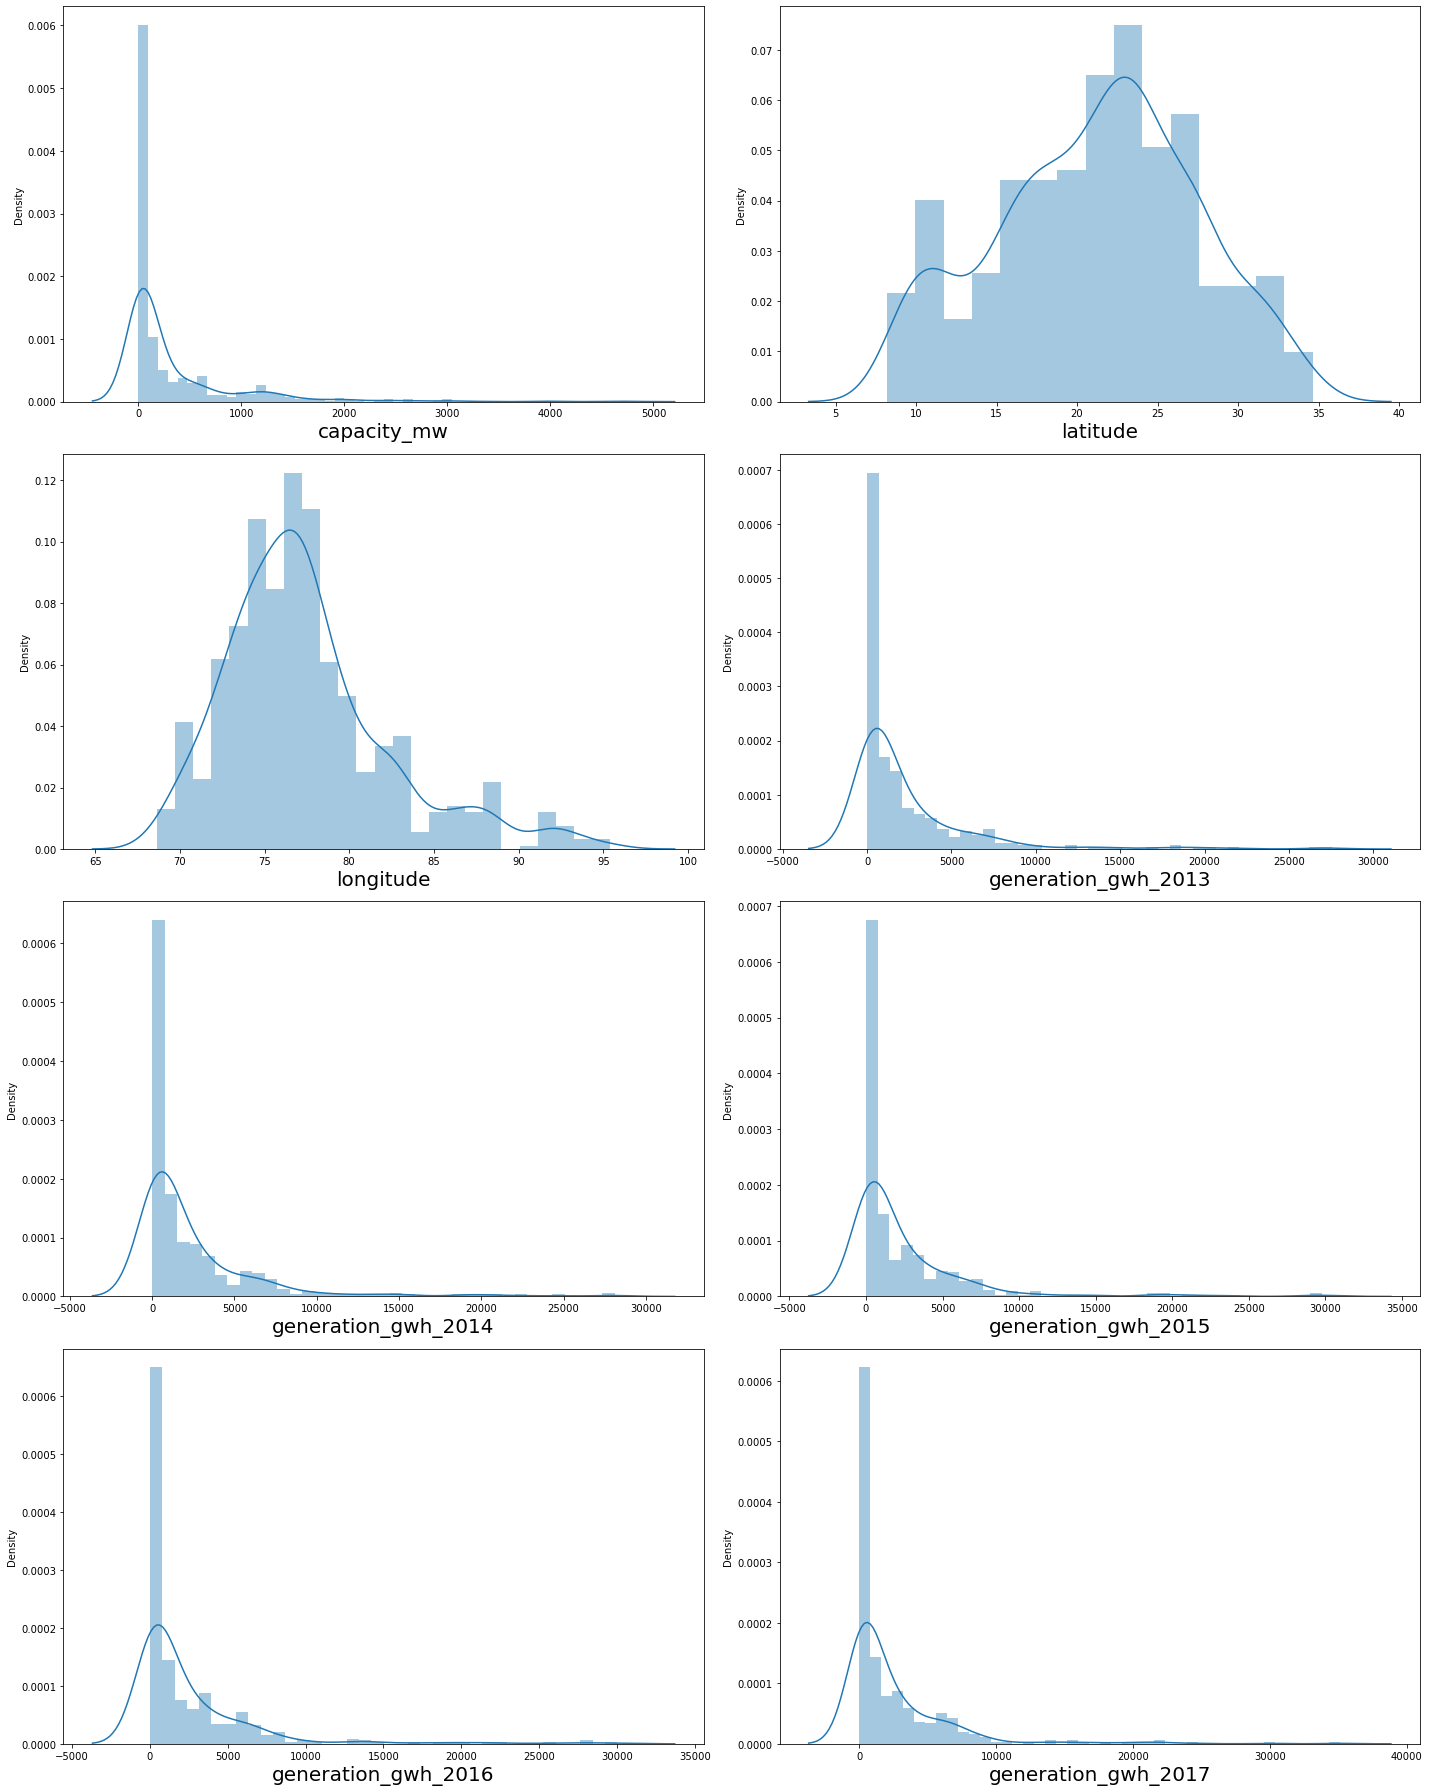

In [144]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in powerplant_numerical:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(powerplant_numerical[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

capacity_mw, longitude, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 are right skewed while latitude is normally distributed

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

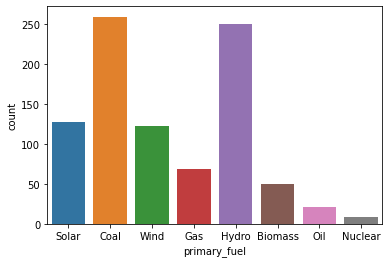

In [147]:
sns.countplot(powerplant['primary_fuel'])

Coal and Hydro are the most used primary fuel while Nuclear is the least used

In [5]:
powerplant.primary_fuel.value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

There are 8 unique classes in our Target variable

## Preprocessing

In [148]:
powerplant.drop(columns=['country','country_long','name','gppd_idnr','other_fuel2','other_fuel3','url','wepp_id','year_of_capacity_data','generation_data_source','estimated_generation_gwh'],axis=1,inplace=True)

Dropping all these features since it gives no meaning to the dataset

## Replacing Null values

In [149]:
powerplant['generation_gwh_2013']=powerplant['generation_gwh_2013'].fillna(powerplant['generation_gwh_2013'].mean())
powerplant['generation_gwh_2014']=powerplant['generation_gwh_2014'].fillna(powerplant['generation_gwh_2014'].mean())
powerplant['generation_gwh_2015']=powerplant['generation_gwh_2015'].fillna(powerplant['generation_gwh_2015'].mean())
powerplant['generation_gwh_2016']=powerplant['generation_gwh_2016'].fillna(powerplant['generation_gwh_2016'].mean())
powerplant['generation_gwh_2017']=powerplant['generation_gwh_2017'].fillna(powerplant['generation_gwh_2017'].mean())
powerplant['longitude']=powerplant['longitude'].fillna(powerplant['longitude'].mean())
powerplant['latitude']=powerplant['latitude'].fillna(powerplant['latitude'].mean())
powerplant['owner']=powerplant['owner'].fillna(powerplant['owner'].mode()[0])
powerplant['geolocation_source']=powerplant['geolocation_source'].fillna(powerplant['geolocation_source'].mode()[0])
powerplant['commissioning_year']=powerplant['commissioning_year'].fillna(powerplant['commissioning_year'].mode()[0])
powerplant['other_fuel1']=powerplant['other_fuel1'].fillna(powerplant['other_fuel1'].mode()[0])

In [150]:
df.isna().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
owner                  0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

Successfully replaced the null values

## Encoding

In [151]:
#Converting strings into numberical format

from sklearn.preprocessing import LabelEncoder

lab_enc=LabelEncoder()

powerplant1=lab_enc.fit_transform(powerplant['owner'])
powerplant2=lab_enc.fit_transform(powerplant['other_fuel1'])
powerplant3=lab_enc.fit_transform(powerplant['geolocation_source'])
powerplant4=lab_enc.fit_transform(powerplant['primary_fuel'])
powerplant5=lab_enc.fit_transform(powerplant['source'])


powerplant['owner']=powerplant1
powerplant['other_fuel1']=powerplant2
powerplant['geolocation_source']=powerplant3
powerplant['primary_fuel']=powerplant4
powerplant['source']=powerplant5

In [152]:
powerplant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    int32  
 4   other_fuel1          908 non-null    int32  
 5   commissioning_year   908 non-null    float64
 6   owner                908 non-null    int32  
 7   source               908 non-null    int32  
 8   geolocation_source   908 non-null    int32  
 9   generation_gwh_2013  908 non-null    float64
 10  generation_gwh_2014  908 non-null    float64
 11  generation_gwh_2015  908 non-null    float64
 12  generation_gwh_2016  908 non-null    float64
 13  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), int32(5)
memory usage: 81.7 KB


Successfully converted string values to numerical data

## Multivariate Analysis

In [47]:
corr_p=powerplant.corr()
corr_p.shape

(14, 14)

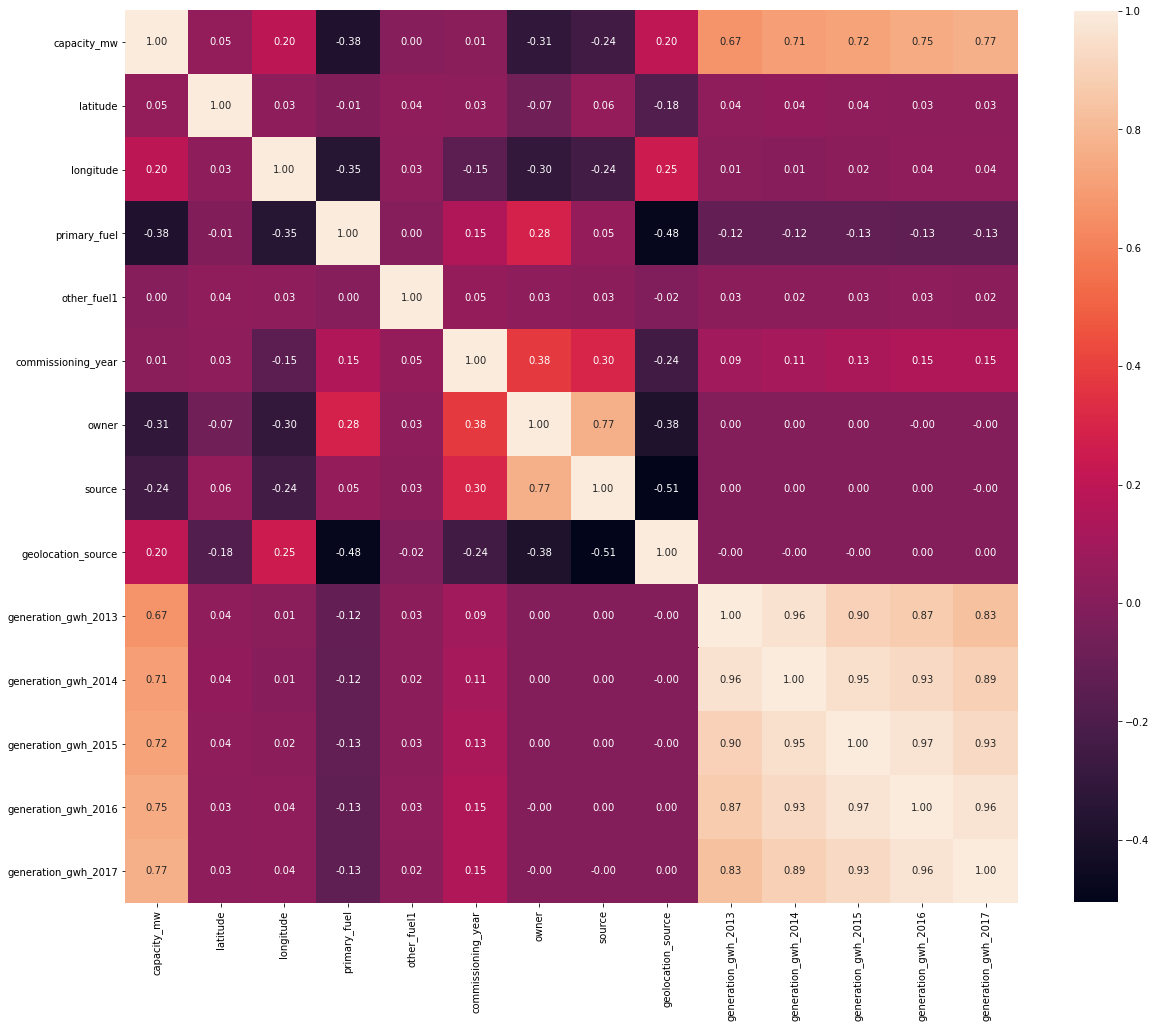

In [49]:
#plotting the heatmap of correlation between features

plt.figure(figsize=(20,20))

sns.heatmap(corr_p,cbar=True,square=True,cbar_kws={'shrink':0.82},fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

We see very strong correlation between features generation_gwh_2013 with generation_gwh_2014, generation_gwh_2015, generation_gwh_2016 and generation_gwh_2017. 

## Finding outliers

In [52]:
powerplant_outliers=powerplant[['capacity_mw','latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

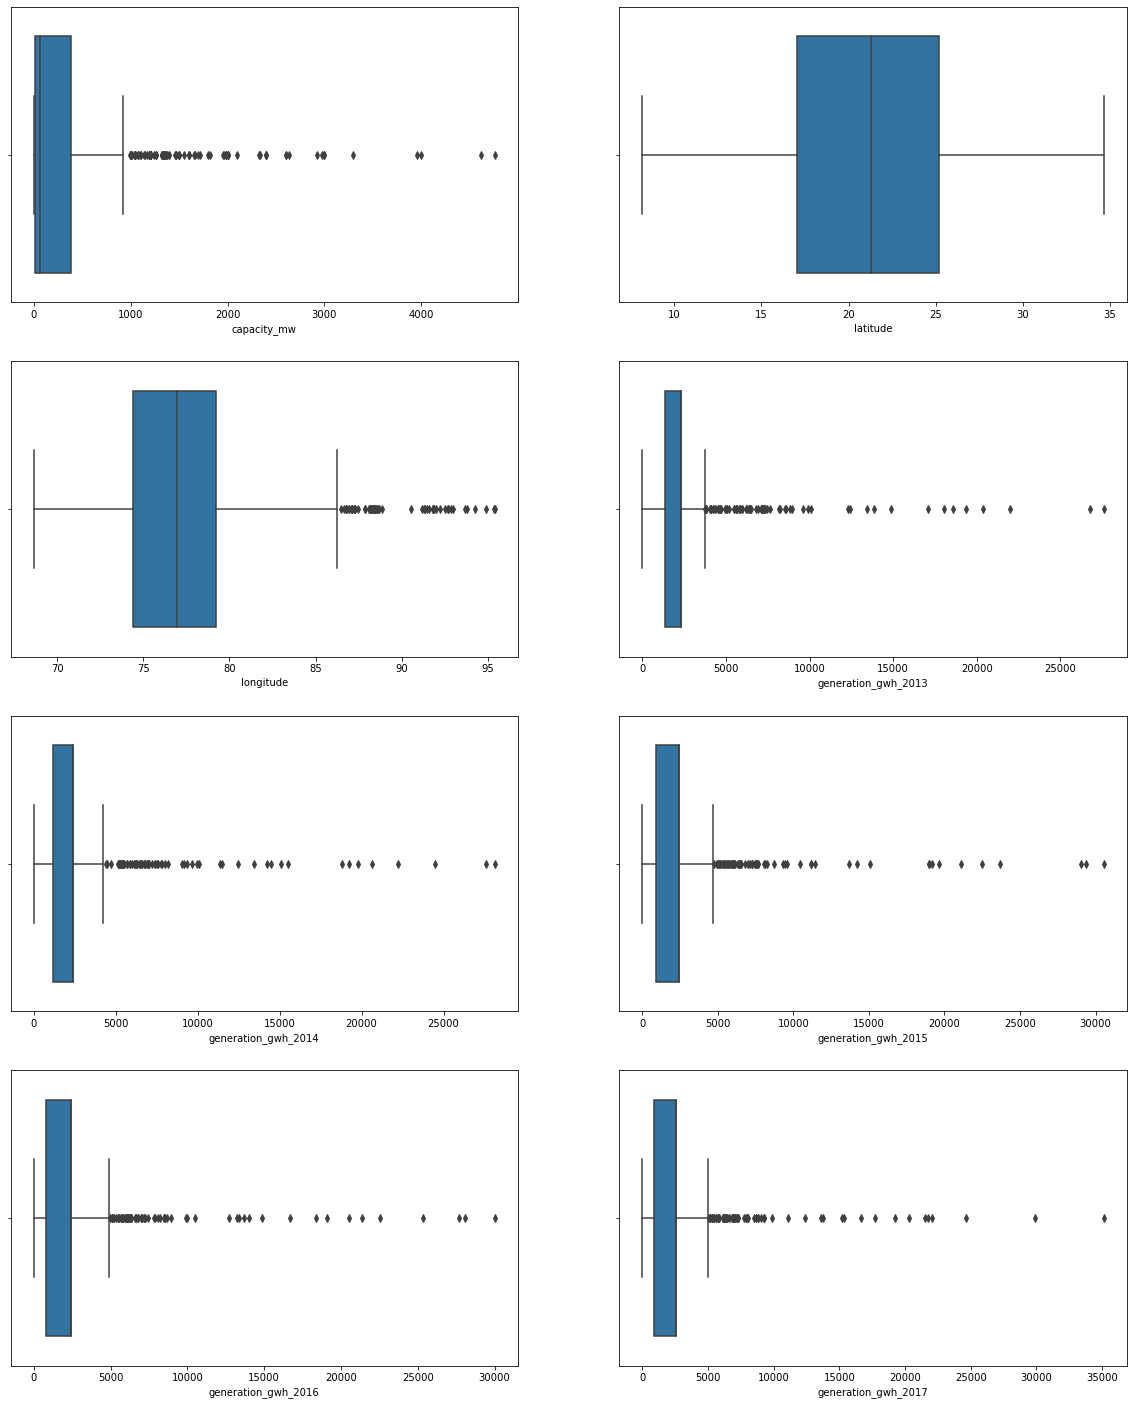

In [53]:
plt.figure(figsize=(20,25))
graph=1

for column in powerplant_outliers:
    if(graph<=8):
        ax=plt.subplot(4,2,graph)
        sns.boxplot(powerplant_outliers[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

## Removing Outliers

In [55]:
from scipy.stats import zscore

z_score=zscore(powerplant[['capacity_mw','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)
powerplant=powerplant[filtering_entry]

powerplant.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,867.000000,867.000000,867.000000,867.000000,867.000000,867.00000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,262.860970,21.093784,77.025306,3.267589,1.995386,2003.82699,58.354095,44.754325,1.723183,2061.950361,2141.514054,2108.891748,2146.283478,2219.035816
std,416.438061,6.157370,4.200192,2.303707,0.083109,15.30755,83.612119,45.361477,0.687705,1374.694986,1467.225117,1512.523628,1571.429220,1618.696466
min,0.000000,8.168900,68.644700,0.000000,0.000000,1927.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.500000,16.899050,74.318150,1.000000,2.000000,1998.00000,5.000000,22.000000,2.000000,1394.374750,1193.179125,859.643500,819.636225,862.067375
50%,50.400000,21.196189,76.737000,3.000000,2.000000,2013.00000,5.000000,22.000000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,317.500000,25.134100,78.906250,6.000000,2.000000,2013.00000,104.500000,38.500000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,2000.000000,34.649000,91.565000,7.000000,2.000000,2018.00000,279.000000,190.000000,2.000000,8965.595000,9983.018000,10422.690000,10503.882000,9833.690000


In [56]:
powerplant.shape

(867, 14)

In [57]:
(908-867)/908*100

4.5154185022026425

We have lost around 4.5% of data which is acceptable

## Checking Skewness

In [58]:
powerplant.skew()

capacity_mw             2.017835
latitude               -0.103418
longitude               0.864288
primary_fuel            0.419751
other_fuel1           -19.995286
commissioning_year     -1.823597
owner                   1.302498
source                  1.763889
geolocation_source     -2.097749
generation_gwh_2013     1.529639
generation_gwh_2014     1.441757
generation_gwh_2015     1.328513
generation_gwh_2016     1.354065
generation_gwh_2017     1.250408
dtype: float64

There is skewness in capacity_mw, longitude, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016 and generation_gwh_2017

## Removing Skewness

In [60]:
powerplant['capacity_mw'] = np.sqrt(powerplant['capacity_mw'])
powerplant['longitude'] = np.sqrt(powerplant['longitude'])
powerplant['generation_gwh_2013'] = np.sqrt(powerplant['generation_gwh_2013'])
powerplant['generation_gwh_2014'] = np.sqrt(powerplant['generation_gwh_2014'])
powerplant['generation_gwh_2015'] = np.sqrt(powerplant['generation_gwh_2015'])
powerplant['generation_gwh_2016'] = np.sqrt(powerplant['generation_gwh_2016'])
powerplant['generation_gwh_2013'] = np.sqrt(powerplant['generation_gwh_2017'])

In [61]:
powerplant.skew()

capacity_mw             1.185039
latitude               -0.103418
longitude               0.774656
primary_fuel            0.419751
other_fuel1           -19.995286
commissioning_year     -1.823597
owner                   1.302498
source                  1.763889
geolocation_source     -2.097749
generation_gwh_2013    -0.431384
generation_gwh_2014    -0.493262
generation_gwh_2015    -0.452738
generation_gwh_2016    -0.407733
generation_gwh_2017     1.250408
dtype: float64

In [63]:
X=powerplant.drop(columns=['primary_fuel'],axis=1)
y=powerplant['primary_fuel']

Splitting the data into features and labels

In [64]:
y.value_counts()

1    237
3    236
6    126
7    123
2     65
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

Unbalanced class

In [65]:
#Balancing the class

from imblearn.over_sampling import SMOTE
SM=SMOTE()
X,y=SM.fit_resample(X,y)

y.value_counts()

7    237
6    237
5    237
4    237
3    237
2    237
1    237
0    237
Name: primary_fuel, dtype: int64

The target variable is now balanced

In [66]:
#Standardizing

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

#Checking multicollinearity by vif

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,2.451068,capacity_mw
1,1.151373,latitude
2,1.208348,longitude
3,1.121714,other_fuel1
4,1.425690,commissioning_year
5,4.027229,owner
6,3.234695,source
7,1.391838,geolocation_source
8,15.451807,generation_gwh_2013
9,5.068938,generation_gwh_2014


The collinearity is confirmed so we will delete one of the feature that has high collinearity

In [67]:
X.drop(columns=['generation_gwh_2013'],axis=1,inplace=True)

In [68]:
#Standardizing

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

#Checking multicollinearity by vif

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,2.095771,capacity_mw
1,1.151361,latitude
2,1.203541,longitude
3,1.111156,other_fuel1
4,1.423028,commissioning_year
5,4.024366,owner
6,3.232924,source
7,1.391671,geolocation_source
8,5.056604,generation_gwh_2014
9,10.524594,generation_gwh_2015


In [69]:
X.drop(columns=['generation_gwh_2016'],axis=1,inplace=True)

In [70]:
#Standardizing

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

#Checking multicollinearity by vif

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,2.057564,capacity_mw
1,1.144910,latitude
2,1.179163,longitude
3,1.099601,other_fuel1
4,1.400558,commissioning_year
5,4.006111,owner
6,3.232903,source
7,1.391495,geolocation_source
8,5.053420,generation_gwh_2014
9,6.300423,generation_gwh_2015


In [71]:
X.drop(columns=['generation_gwh_2015'],axis=1,inplace=True)

In [72]:
#Standardizing

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

#Checking multicollinearity by vif

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,2.050860,capacity_mw
1,1.137778,latitude
2,1.178606,longitude
3,1.078987,other_fuel1
4,1.374525,commissioning_year
5,3.997339,owner
6,3.232879,source
7,1.391412,geolocation_source
8,2.381491,generation_gwh_2014
9,2.706614,generation_gwh_2017


# Model Training

## Finding the best random state

In [75]:
maxAccu=0
maxRs=0
for i in range(1,200):
    X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(X_train,Y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best accuracy is:",maxAccu,"on Random State",maxRs)

Best accuracy is: 0.9092827004219409 on Random State 58


In [76]:
X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=58)

Splitting the data into train and test data

### Checking accuracy by using different models

In [77]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)
pred=DTC.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.66      0.66      0.66        50
           2       0.84      0.81      0.82        58
           3       0.83      0.89      0.86        61
           4       0.95      0.92      0.94        64
           5       0.94      0.98      0.96        59
           6       1.00      0.98      0.99        62
           7       1.00      1.00      1.00        66

    accuracy                           0.91       474
   macro avg       0.90      0.90      0.90       474
weighted avg       0.91      0.91      0.91       474



The accuracy for Decision Tree Classifier is 91%

In [78]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
pred=RFC.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        54
           1       0.89      0.78      0.83        50
           2       0.93      0.86      0.89        58
           3       0.86      0.93      0.90        61
           4       0.98      0.98      0.98        64
           5       0.93      0.97      0.95        59
           6       1.00      0.98      0.99        62
           7       1.00      1.00      1.00        66

    accuracy                           0.94       474
   macro avg       0.94      0.94      0.94       474
weighted avg       0.94      0.94      0.94       474



The accuracy for Random Forest Classifier is 94%

In [79]:
SV=SVC()
SV.fit(X_train,Y_train)
pred=SV.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        54
           1       0.74      0.56      0.64        50
           2       0.80      0.67      0.73        58
           3       0.80      0.87      0.83        61
           4       0.91      1.00      0.96        64
           5       0.81      0.75      0.78        59
           6       1.00      0.98      0.99        62
           7       0.79      1.00      0.88        66

    accuracy                           0.84       474
   macro avg       0.83      0.83      0.83       474
weighted avg       0.84      0.84      0.83       474



The accuracy for Support Vector Classifier is 84%

In [80]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        54
           1       0.62      0.46      0.53        50
           2       0.75      0.52      0.61        58
           3       0.65      0.75      0.70        61
           4       0.83      0.92      0.87        64
           5       0.76      0.64      0.70        59
           6       1.00      0.98      0.99        62
           7       0.77      0.95      0.85        66

    accuracy                           0.77       474
   macro avg       0.76      0.76      0.75       474
weighted avg       0.77      0.77      0.76       474



The accuracy for Logistic Regression is 77%

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
pred=knn.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        54
           1       0.74      0.56      0.64        50
           2       0.87      0.78      0.82        58
           3       0.86      0.89      0.87        61
           4       0.91      0.98      0.95        64
           5       0.87      0.92      0.89        59
           6       1.00      0.98      0.99        62
           7       0.94      0.97      0.96        66

    accuracy                           0.89       474
   macro avg       0.88      0.88      0.88       474
weighted avg       0.89      0.89      0.89       474



The accuracy for KNeighborsClassifier is 89%

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
pred=gbc.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        54
           1       0.80      0.72      0.76        50
           2       0.90      0.90      0.90        58
           3       0.89      0.92      0.90        61
           4       0.95      0.97      0.96        64
           5       0.95      0.95      0.95        59
           6       1.00      1.00      1.00        62
           7       1.00      1.00      1.00        66

    accuracy                           0.93       474
   macro avg       0.93      0.93      0.93       474
weighted avg       0.93      0.93      0.93       474



The accuracy for Gradient Boosting Classifier is 93%

## Cross validation

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
print(cross_val_score(DTC,X_scaler,y,cv=5).mean())

0.8755367310095821


In [87]:
print(cross_val_score(RFC,X_scaler,y,cv=5).mean())

0.9230037494792391


In [88]:
print(cross_val_score(SV,X_scaler,y,cv=5).mean())

0.8243827246215802


In [89]:
print(cross_val_score(lr,X_scaler,y,cv=5).mean())

0.7389376475489515


In [90]:
print(cross_val_score(ada,X_scaler,y,cv=5).mean())

0.3628648798777948


In [91]:
print(cross_val_score(knn,X_scaler,y,cv=5).mean())

0.8797542008054438


In [92]:
print(cross_val_score(gbc,X_scaler,y,cv=5).mean())

0.9092931537286489


The difference between Accuracy and Cross validation is the least in RFC,  SVC, and GBC but F1 Score is highest for RFC so RFC is our best model

## Hyperparameter Tuning

In [95]:
parameters={'n_estimators':[200,700],
           'max_features':['auto','sqrt','log2'],
           'criterion':['gini', 'entropy'],
           'max_depth':[4,5,6,7,8]}

In [96]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [97]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [98]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 700}

In [99]:
Final_model=RandomForestClassifier(n_estimators=700,max_features='auto',criterion='entropy',max_depth=8)
Final_model.fit(X_train,Y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy:',acc*100)

Accuracy: 91.9831223628692


The accuracy has reduced to 92% from 94% due to overfitting of the model

## Saving the model

In [153]:
import joblib
joblib.dump(Final_model,"FinalModelPowerplant.pkl")

['FinalModelPowerplant.pkl']

## Loading the model

In [154]:
mod=joblib.load("FinalModelPowerplant.pkl")
prediction=mod.predict(x_test)
prediction=pd.DataFrame(prediction)
prediction.to_csv('ResultsPowerplant.csv',index=False)